# Predicting King's County Housing Prices

## Introduction
I will be following the Cross-Industry Standard Process for Data Mining (CRISP-DM) to predict housing prices in King's County.  

CRISP-DM is a life cycle consisting of six phases:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

## 1. Business Understanding
I will be building a multivariate regression on King's County house sale prices, with an ultimate goal of predicting house sale price as accurately as possible.  This exercise will be completed in the context of a private equity / real estate investment firm looking for diligence and valuation support.  

Identifying features of a home that are most likely to impact sale price can enable investment professionals to look for these features when evaluating homes for purchase.  Additionally, property managers looking to increase the value of an existing home may be able to leverage our findings to influence which renovations will be completed on a home first.

In the hands of investment professionals, this tool can be leveraged to validate assets are being purchased for proper valuations and used to maximize return realization. 

## 2. Data Understanding
This project uses the King's County House Sales dataset, a csv file containing the following columns:
* `id` - unique identifier for a house
* `date` - date house was sold
* `price` - sale price and the prediction target
* `bedrooms` - number of bedrooms/house
* `bathrooms` - number of bathrooms/bedrooms
* `sqft_living` - square footage of the home
* `sqft_lot` - square footage of the lot
* `floors` - total floors (levels) in the house
* `waterfront` - house which has a view to a waterfront
* `view` - has been viewed
* `condition` - how good the condition is (Overall)
* `grade` - overall grade given to the housing unit, based on King County grading system
* `sqft_above` - square footage of house apart from basement
* `sqft_basement` - square footage of the basement
* `yr_built` - year built
* `yr_renovated` - year when house was renovated
* `zipcode` - zipcode
* `lat` - latitude coordinate
* `long` - longitude coordinate
* `sqft_living15` - the square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - the square footage of the land lots of the nearest 15 neighbors

### Import Dataset
Now that we have a good understanding of the columns and features in the dataset, move forward with loading the dataset to continue further exploration of the data, including analysis of variable distributions, number of entries, median values, etc.  

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
# print available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
# set style of visualizations
sns.set_theme() # reset default params
plt.style.use('seaborn-darkgrid')

In [4]:
# load dataset and display first rows to ensure loaded properly
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
# display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Looking at the above, we can see that our dataset occupies just over 3.5 MB of storage, and includes 20 columns and 21,597 rows.  From first glance, we can see that some columns appear to be missing some values.  All columns appear to be numerical format (either float or int), with the exception of `date` and `sqft_basement`.  

### Initial EDA - Target Variable
Now the dataset has been successfully loaded, and its overall structure has been analyzed, going to move forward with additional EDA to unpack our variables and better understand the data available to us.  

In [6]:
# separate out target and predictors
target = df['price']
predictors = df.drop('price', axis=1)

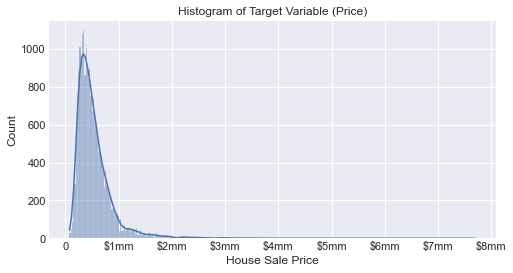

In [7]:
# display histogram of target with KDE smoothing
plt.figure(figsize=(8, 4))
ax = sns.histplot(data=target, kde=True, bins='auto')
plt.title('Histogram of Target Variable (Price)')
plt.xlabel('House Sale Price')
x_labels = ['0', '$1mm', '$2mm', '$3mm', '$4mm', '$5mm', '$6mm', '$7mm', '$8mm']
ax.set(xticks=np.linspace(0, 8000000, 9), xticklabels=(x_labels))
plt.show()

Reviewing the distribution of the target variable, `price`, we can see the majority of houses seem to fall below $2 million.  There is a significant right skew, with a number of outliers likely present with higher house sale prices.  Looking at additional summary stats will give more information on the target variable.

In [8]:
# print summary statistics and round to 2 decimals
print(f'Minimum House Sale Price: {round(target.min(), 2)}')
print(f'Maximum House Sale Price: {round(target.max(), 2)}')
print(f'Median House Sale Price: {round(target.median(), 2)}')
print(f'Mean House Sale Price: {round(target.mean(), 2)}')
print(f'House Sale Price STD: {round(target.std(), 2)}')
print(f'House Sale Price Q1: {round(target.quantile(0.25), 2)}')
print(f'House Sale Price Q3: {round(target.quantile(0.75), 2)}')

Minimum House Sale Price: 78000.0
Maximum House Sale Price: 7700000.0
Median House Sale Price: 450000.0
Mean House Sale Price: 540296.57
House Sale Price STD: 367368.14
House Sale Price Q1: 322000.0
House Sale Price Q3: 645000.0


There is quite a bit of range in our target variable, with the lowest house value coming in at \\$78k and the highest house value coming in at \\$7.7m.  The presence of outliers is evident, especially when comparing the median sale price of \\$450k with the mean sale price of \\$540k.  Standard deviation is \\$367k.  

25% percent of houses were \\$322k and less.  75% of houses were \\$645k and less.

We have a good sense of the target variable and how the majority of houses in King's County shake out in terms of sale price.  Move forward with exploring predictors and other features. 

### Initial EDA - Predictors
Start by plotting a histogram and KDE plot for each predictor to get a sense of the distributions.  Similar to the target variable above, move forward with printing summary stats as well. 

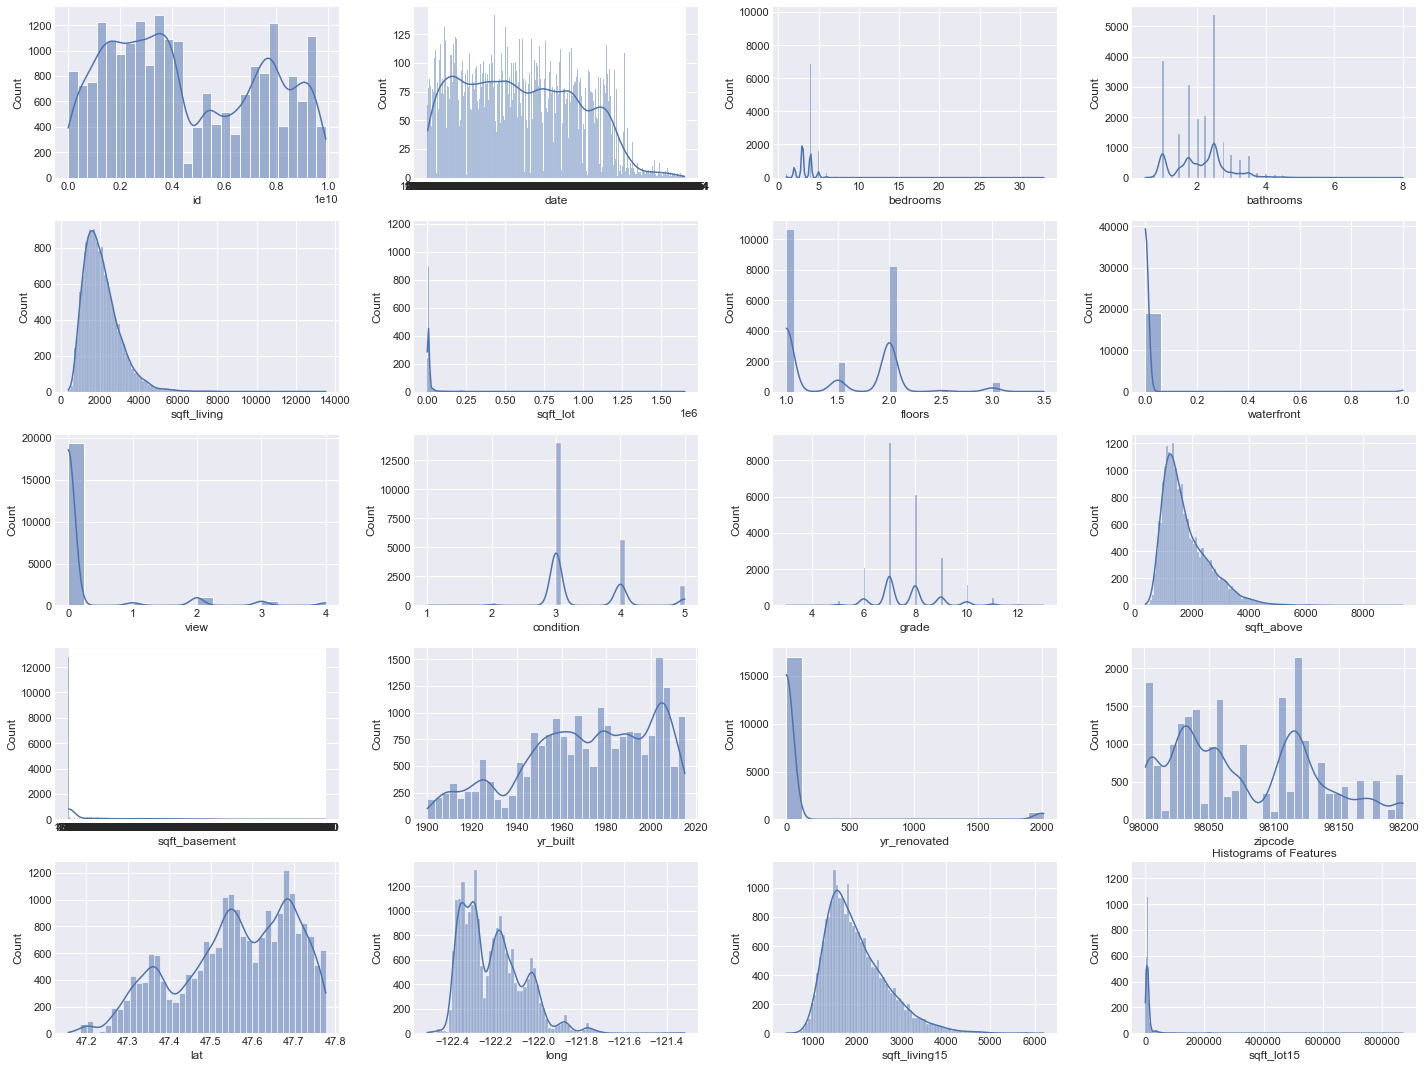

In [9]:
# set up subplots for a total of 20 plots
fig, axes = plt.subplots(nrows = 5, ncols=4, figsize=(20, 15))
for ax, feat in zip(axes.flatten(), predictors.columns):
    sns.histplot(data=predictors[feat], kde=True, ax=ax, bins='auto') 
plt.tight_layout()
plt.title('Histograms of Features')
plt.show()

This gives us a high-level view of our predictors and how they roughly are distributed. While this visualization is helpful for most variables, there are some where the data is either too zoomed out or there were some issues when pulling in x-axis values.  Replot histograms of select variables to fix plotting issues and help further analyze distributions.

Observations:
* `id`: scale is likely skewing results, further exploration is necessary, but this column will likely be dropped as it is just a unique identifier. 
* `date`: x-axis is unreadable, but looks like there is a drop off in data of houses sold recently if data is aligned by time as presented. 
* `bedrooms`: Majority seeem to fall between 1 and 5. Likely outliers with higher values. 
* `bathrooms`: Majority fall between 1 and 4, with some outliers above 4.  
* `sqft_living`: Unimodal, with the majority of values falling between 0 and 5000 sqft. Right skew is present. 
* `sqft_lot`: Hard to interpret from this view, will benefit from a replot
* `floors`: Spikes at 1 and 2 floors, with smaller spikes at 1.5 and 3.0. 
* `waterfront`: Majority seem to have 0 values, corresponding with not having waterfront views.
* `view`: The majority have been viewed 0 times, with slight bumps at 2.0 and 3.0 views. 
* `condition`: Majority of KC houses appear to have condition ratings of 3.0, with a large number of houses also receiving 4.0 and 5.0 condition ratings. 
* `grade`: Majority of KC houses appear to have grades between 6 and 10. 
* `sqft_above`: Unimodal around 2000 sqft with right skew. 
* `sqft_basement`: Large number of 0 values, hard to interpret axis from this view. 
* `yr_built`: The majority of houses in the dataset appear to have been built from 2000 onward, with the oldest house represented being built in 1990.  
* `yr_renovated`: Large number of 0 values and a bump of values around 2000.  May have been a trend of renovations around 2000.  
* `zipcode`: Some variation, with the most common zipcodes between 100 and 150 -- will need to explore this further.
* `lat`: Looks trimodal with centers between 0.3 and 0.4, 0.5 and 0.6, and around 0.7.
* `long`: Looks trimodal as well, with the majority of values between -2.4 and -2.0
* `sqft_living15`: majority of values close to 2000 sq ft, with some right skew
* `sqft_lot15`: significant right skew, will benefit from replotting.

In [10]:
# convert date to datetime column and replot 
predictors['datetime'] = pd.to_datetime(predictors['date'], infer_datetime_format=True)

# drop initial date column
predictors = predictors.drop('date', axis=1)

In [11]:
# explore sqft_basement to understand why not plotting
predictors['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1008.0        1
516.0         1
2190.0        1
176.0         1
1275.0        1
Name: sqft_basement, Length: 304, dtype: int64

We can see that there are `?` values within the sqft_basement column.  These are causing issues.  Given informatino is missing for these and there are only 454 of them, we will remove these entries for now.  

In [12]:
# concat consolidated df and remove `?` values
df = pd.concat([target, predictors], axis=1)
df = df.loc[df['sqft_basement'] != '?']

In [13]:
# change type of sqft_basement
df['sqft_basement'] = df['sqft_basement'].astype('float64')

In [14]:
# separate out target and predictors
target = df['price']
predictors = df.drop('price', axis=1)

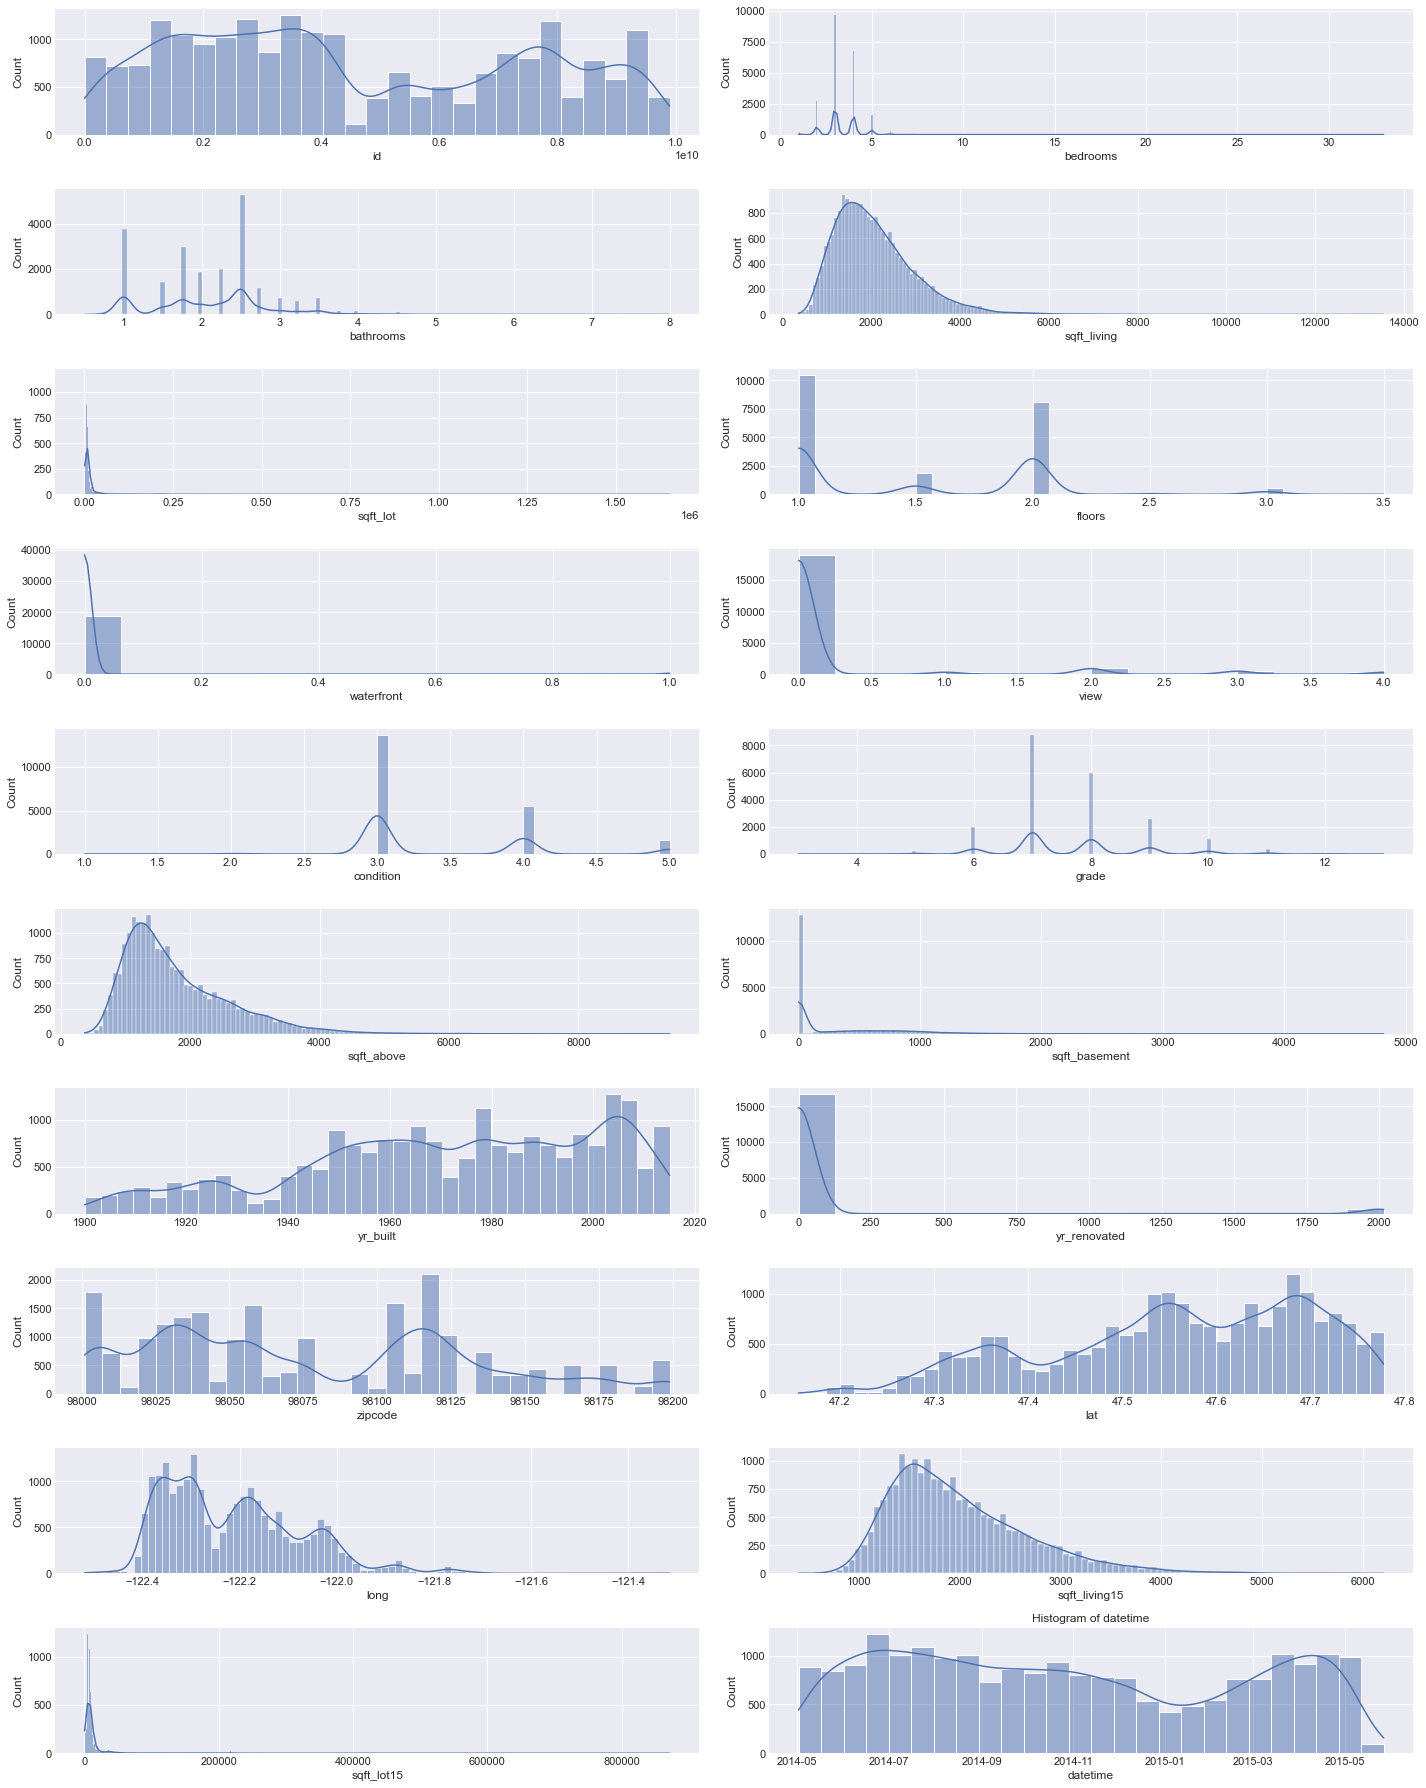

In [15]:
# replot histograms and kde plots, this time only using 2 columns
fig, axes = plt.subplots(nrows = 10, ncols=2, figsize=(20, 25))
for ax, feat in zip(axes.flatten(), predictors.columns):
    sns.histplot(data=predictors[feat], kde=True, ax=ax, bins='auto')
    plt.title(f'Histogram of {feat}')
plt.tight_layout()
plt.show()

Replotting the histograms of our features, we see many of the issues we saw before are fixed now, and we are able to explore the distributions further of our features.  Move forward with plotting summary statistics to understand range of values, median and most common values, and standard deviations.  

In [16]:
# print summary statistics
predictors.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.114300e+04,21143.000000,21143.000000,21143.000000,2.114300e+04,21143.000000,18804.000000,21082.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,17389.000000,21143.000000,21143.000000,21143.000000,21143.00000,21143.000000
mean,4.581004e+09,3.372558,2.116079,2080.920730,1.508714e+04,1.493591,0.007552,0.233327,3.409923,7.658279,1789.069006,291.851724,1971.023223,82.991949,98077.868893,47.560274,-122.213876,1987.27139,12738.941967
std,2.876328e+09,0.924917,0.768531,918.547562,4.120920e+04,0.539249,0.086573,0.765066,0.650498,1.174253,828.409769,442.498337,29.321938,398.481819,53.535756,0.138591,0.140597,685.67034,27169.273663
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.00000,651.000000
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471250,-122.328000,1490.00000,5100.000000
50%,3.904940e+09,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.00000,7626.000000
75%,7.309100e+09,4.000000,2.500000,2550.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.00000,10087.000000
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.00000,871200.000000


Replotting the histograms of our features, we see many of the issues we saw before are fixed now, and we are able to explore the distributions further of our features.

Observations:
* `id`: Again, not very helpful given this is just a unique identifier
* `bedrooms`: We see the majority of KC houses have 1 to 5 bedrooms, with some outliers having more than 5.  The median number of bedrooms in KC is 3.   
* `bathrooms`: The majority of KC houses have less than 3 bathrooms, with houses having 1 or 2.5 bathrooms being most common. The median is 2.25, with 75% of all houses in the dataset having 2.5 bathrooms or fewer. 
* `sqft_living`: Median living size is just under 2000 sq. ft at 1,910 sq.ft.  75% of KC houses have houses with 2,550 sq. ft. and less. 
* `sqft_lot`: The presence of outliers is clear, given the small unimodal bump close to 0, with a significant right skew.  Median lot size is 7,620 sqft. 
* `floors`: 75% of houses in KC have 2 floors or fewer.  The highest house has 3.5 floors.
* `waterfront`: Very few houses in KC have waterfront views
* `view`: Most houses in KC have not been viewed
* `condition`: Median condition is 3 - seems we have a good representation of mid-condition homes. 
* `grade`: Median house grade is 7, with a max grade of 13 in the dataset.  Minimum grade is 3 - - seems the scale may have been shifted to remove 0 grades by 3 to the right. 
* `sqft_above`: Median sqft above is 1,560 sq. ft, with 75% of all KC houses having sqft above of 2,210 or less
* `sqft_basement`: A large number of houses do not have basements
* `yr_built`: The earliest KC house in the dataset was built in 1900, the earlies built in 2015.  Median yr_built is 1975.  75% of all houses were built in 1997 or prior. 
* `yr_renovated`: Majority have not been renovated. 
* `zipcode`: Good range of values
* `lat`: see notes above
* `long`: see notes above
* `sqft_living15`: median of 1,840, max of 6,210 sqft. 
* `sqft_lot15`: median of 7,626 sqft., max of 871,200 sqft. (this may be a mistake, definitely an outlier at the minimum). 
* `datetime`: We see date sold ranges from May 2014 to May 2015

Now that we have a solid understanding of the data available to us, and have explored the distributions of target and predictor variables, move forward with preparing the data for modeling.  

## 3. Data Preparation
Starting with the raw dataset, clean and prepare the dataset for regression, ensuring assumptions for linear regression are not violated along the way. 

In [17]:
# import raw dataset
raw_df = pd.read_csv('data/kc_house_data.csv')

# display df info
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We know from data understanding phase that we can drop the `id` column.  Additionally, we know we will have to handle the `?` values found within the `sqft_basement` column.  Finally, we will have to convert the date column to datetime.  We will start with these clean-ups prior to moving to additional preprocessing steps. 

In [18]:
# drop id column
clean_df = raw_df.drop('id', axis=1)

# drop ? values from sqft_basement - there are only a few
clean_df = clean_df.loc[clean_df['sqft_basement'] != '?']

# convert sqft_basement to float
clean_df['sqft_basement'] = clean_df['sqft_basement'].astype('float64')

# create datetime column from date and drop original date column
clean_df['date_sold'] = pd.to_datetime(clean_df['date'], infer_datetime_format=True)
clean_df = clean_df.drop('date', axis=1)

Now that initial clean-ups identified during the data understanding stage have been made, move forward with checking the dataset for additional clean-up items, starting with checking for additional missing values. 

### Handle Missing Values

In [19]:
# print number of missing values in each col
clean_df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date_sold           0
dtype: int64

Further explore the missing values to arrive at the best way of handling.  Starting with `waterfront`, we see there is a significant percent of all data that is missing a `waterfront` value, so simply removing these from the dataset is not feasible. Similar with the missing values in `yr_renovated` - there are too many to simply remove.  

In a slightly different scenario is `view`, which is only missing 61 values. Before handling, start with the missing `waterfront` values. 

In [20]:
# separate out missing values
missing_waterfront = clean_df.loc[clean_df['waterfront'].isna()]
missing_view = clean_df.loc[clean_df['view'].isna()]
missing_yr_reno = clean_df.loc[clean_df['yr_renovated'].isna()]

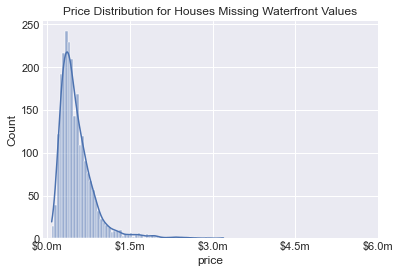

In [21]:
# explore distribution of target variable for missing_waterfront values
ax = sns.histplot(data=missing_waterfront['price'], kde=True, bins='auto')

# relabel xticks for ease of reading
xticks = np.linspace(0, 6000000, 5)
xticklabels = [f'${xtick/1000000}m' for xtick in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

# add title and fix axis labels
plt.title('Price Distribution for Houses Missing Waterfront Values')
plt.show()

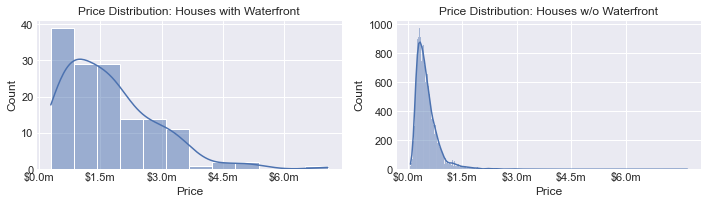

In [22]:
# compare distribution of price to those where waterfront=1 and =0
yes_water = clean_df.loc[clean_df['waterfront'] == 1.0]
no_water = clean_df.loc[clean_df['waterfront'] == 0.0]

# xticks and labels
xticks = np.linspace(0, 6000000, 5)
xticklabels = [f'${xtick/1000000}m' for xtick in xticks]

# display with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
for ax, water_df in zip(axes.flatten(), [yes_water, no_water]):
    sns.histplot(data=water_df['price'], kde=True, ax=ax, bins='auto')
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_xlabel('Price')
axes[0].title.set_text('Price Distribution: Houses with Waterfront')
axes[1].title.set_text('Price Distribution: Houses w/o Waterfront')
plt.tight_layout()
plt.show()

Comparing the price distribution of houses with waterfront and without waterfront to the values in our dataset that are missing values, we see that these missing values have price characteristics aligning to houses without waterfront.  This makes logistical sense also, as houses without waterfront values likely imply the house does not have waterfront.  Going forward, we will set missing waterfront values to 0.

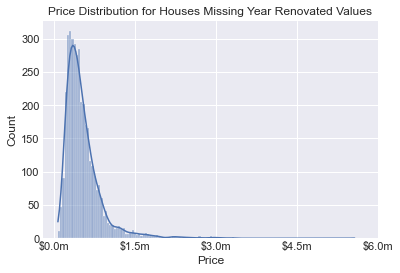

In [23]:
# repeat process for yr_renovated
ax = sns.histplot(data=missing_yr_reno['price'], kde=True, bins='auto')

# relabel xticks for ease of reading
xticks = np.linspace(0, 6000000, 5)
xticklabels = [f'${xtick/1000000}m' for xtick in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

# add title and fix axis labels
plt.title('Price Distribution for Houses Missing Year Renovated Values')
plt.xlabel('Price')
plt.show()

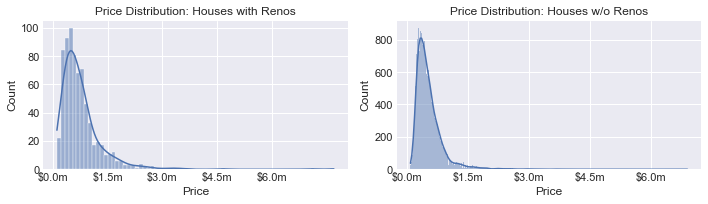

In [24]:
# compare distribution of price to those where waterfront=1 and =0
yes_reno = clean_df.loc[clean_df['yr_renovated'] > 0.0]
no_reno = clean_df.loc[clean_df['yr_renovated'] == 0.0]

# xticks and labels
xticks = np.linspace(0, 6000000, 5)
xticklabels = [f'${xtick/1000000}m' for xtick in xticks]

# display with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
for ax, reno_df in zip(axes.flatten(), [yes_reno, no_reno]):
    sns.histplot(data=reno_df['price'], kde=True, ax=ax, bins='auto')
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_xlabel('Price')
axes[0].title.set_text('Price Distribution: Houses with Renos')
axes[1].title.set_text('Price Distribution: Houses w/o Renos')
plt.tight_layout()
plt.show()

Similar to waterfront, we see missing `yr_renovated` values are more inline with houses that have not undergone any sort of renovation.  The price distributions are more similar and it makes more sense that a house with a missing value is one that has not recevied a reno. Going forward, all missing values will be replaced with 0.

In [25]:
# look at value counts of last column with missing values, view
display(clean_df['view'].value_counts())
display(clean_df['view'].value_counts(normalize=True))

0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

0.0    0.902097
2.0    0.044113
3.0    0.023527
1.0    0.015511
4.0    0.014752
Name: view, dtype: float64

As we noted above, the majority of houses have not been viewed.  Only 10% of houses have been viewed.  Given the number missing data is only 61, a rather miniscule amount, we will move forward dropping these from the dataset.  

In [26]:
# Fill missing values
clean_df['waterfront'] = clean_df['waterfront'].fillna(value=0)
clean_df['yr_renovated'] = clean_df['yr_renovated'].fillna(value=0)

# confirm view is the only column missing values
clean_df.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             61
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
date_sold         0
dtype: int64

In [27]:
# drop remaining missing values
clean_df = clean_df.dropna()

In [28]:
# confirm there are no remaining missing values
clean_df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date_sold        0
dtype: int64

### Check for Duplicates

In [29]:
# check for and handle duplicates if necessary
clean_df.duplicated().sum()

0

There are no duplicated values in the dataset.  Move forward with handling column types.

### Convert Column Types
To ensure our models work and run properly, we will need to ensure our column types are all of a numeric type.  This will also include encoding categorical columns.  

In [30]:
# display column types
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          21082 non-null  float64       
 1   bedrooms       21082 non-null  int64         
 2   bathrooms      21082 non-null  float64       
 3   sqft_living    21082 non-null  int64         
 4   sqft_lot       21082 non-null  int64         
 5   floors         21082 non-null  float64       
 6   waterfront     21082 non-null  float64       
 7   view           21082 non-null  float64       
 8   condition      21082 non-null  int64         
 9   grade          21082 non-null  int64         
 10  sqft_above     21082 non-null  int64         
 11  sqft_basement  21082 non-null  float64       
 12  yr_built       21082 non-null  int64         
 13  yr_renovated   21082 non-null  float64       
 14  zipcode        21082 non-null  int64         
 15  lat            2108

Looking at each column / feature, we see that the only non-numeric column is the date_sold column, currently of type datetime64.  We know we only have one year represented in `date_sold`.  Check to see if there are higher sale prices related with selling at certain times of the year.  To do this, create a month column from the date_sold column.

In [31]:
# add month_sold column
clean_df['month_sold'] = clean_df['date_sold'].map(lambda x: x.month)

# drop initial date_sold column
clean_df = clean_df.drop('date_sold', axis=1)

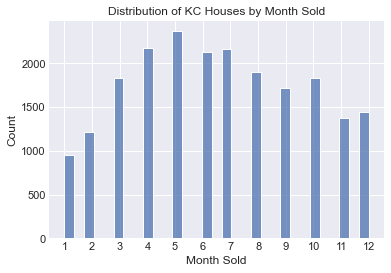

In [32]:
# display month_sold distribution
ax = sns.histplot(data=clean_df['month_sold'])
ax.set_title('Distribution of KC Houses by Month Sold')
ax.set_xlabel('Month Sold')
ax.set_xticks(np.linspace(1, 12, 12))
plt.show()

Can see the majority of houses were sold during th espring, with winter months seeing the fewest number of houses sold. Keep in mind, this is only one year worth of data. 

### Evaluate Relationship of Predictors to Target
Next step is to evaluate which predictors appear to be correlated with price and and remove any features that violate linearity assumptions required for linear regression. Plot scatter plots to see which features might be violating linearity requirements.  These features will ultimately be removed for our baseline model.  As a first step separate continuous features from categorical features, as categorical features will be handled through one-hot encoding later on. 

In [33]:
# separate predictors from target
target = clean_df['price']
feats = clean_df.drop('price', axis=1)

In [34]:
feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21082 non-null  int64  
 1   bathrooms      21082 non-null  float64
 2   sqft_living    21082 non-null  int64  
 3   sqft_lot       21082 non-null  int64  
 4   floors         21082 non-null  float64
 5   waterfront     21082 non-null  float64
 6   view           21082 non-null  float64
 7   condition      21082 non-null  int64  
 8   grade          21082 non-null  int64  
 9   sqft_above     21082 non-null  int64  
 10  sqft_basement  21082 non-null  float64
 11  yr_built       21082 non-null  int64  
 12  yr_renovated   21082 non-null  float64
 13  zipcode        21082 non-null  int64  
 14  lat            21082 non-null  float64
 15  long           21082 non-null  float64
 16  sqft_living15  21082 non-null  int64  
 17  sqft_lot15     21082 non-null  int64  
 18  month_

In [35]:
# separate sqft predictors
sqft_feats = feats[['sqft_living', 'sqft_lot', 
                    'sqft_above', 'sqft_basement',
                    'sqft_living15', 'sqft_lot15']]

cont_feats = feats[['yr_built', 'yr_renovated', 
                    'zipcode','lat', 
                    'long', 'month_sold']]

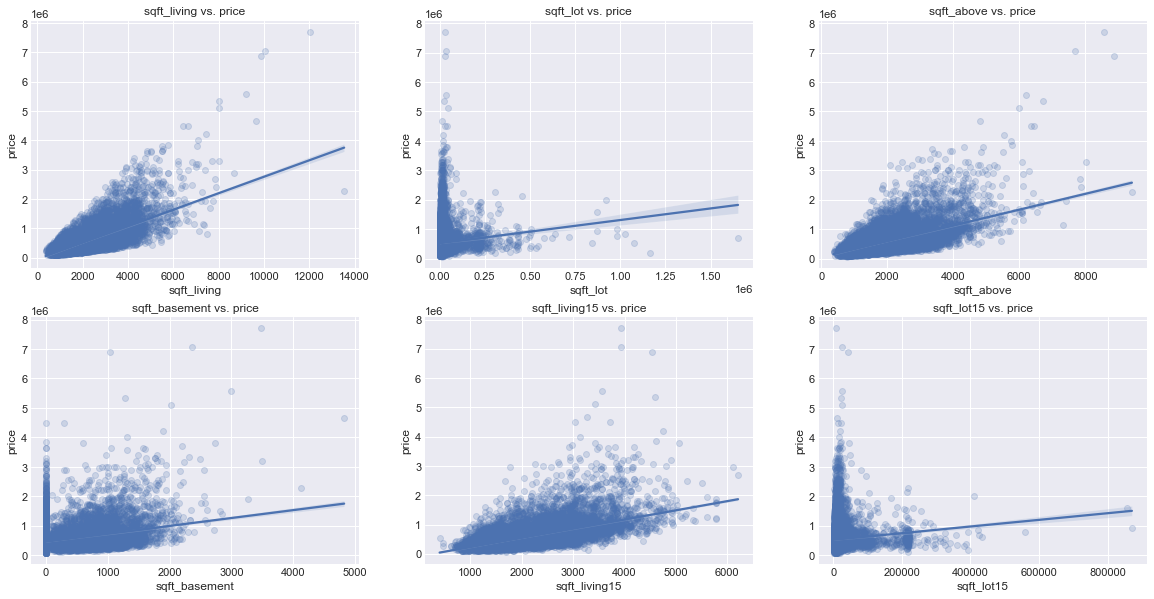

In [36]:
# plot sqft features against price to evaluate linear relationship
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
for ax, feat in zip(axes.flatten(), sqft_feats.columns):
    sns.regplot(x=feat, y='price', data=clean_df, ax=ax, scatter_kws={'alpha': 0.2})
    ax.set_title(f'{feat} vs. price')

Looking at the scatterplots above, we can see that while there is some noise in the data, there appears to be linear relationships between `price` and `sqft_living`, `sqft_above`, and `sqft_living15`.  There seems to be some relationship with `price` and `sqft_lot`, `sqft_basement`, and `sqft_lot15`, but these also show more noise with a large number of zero values. 

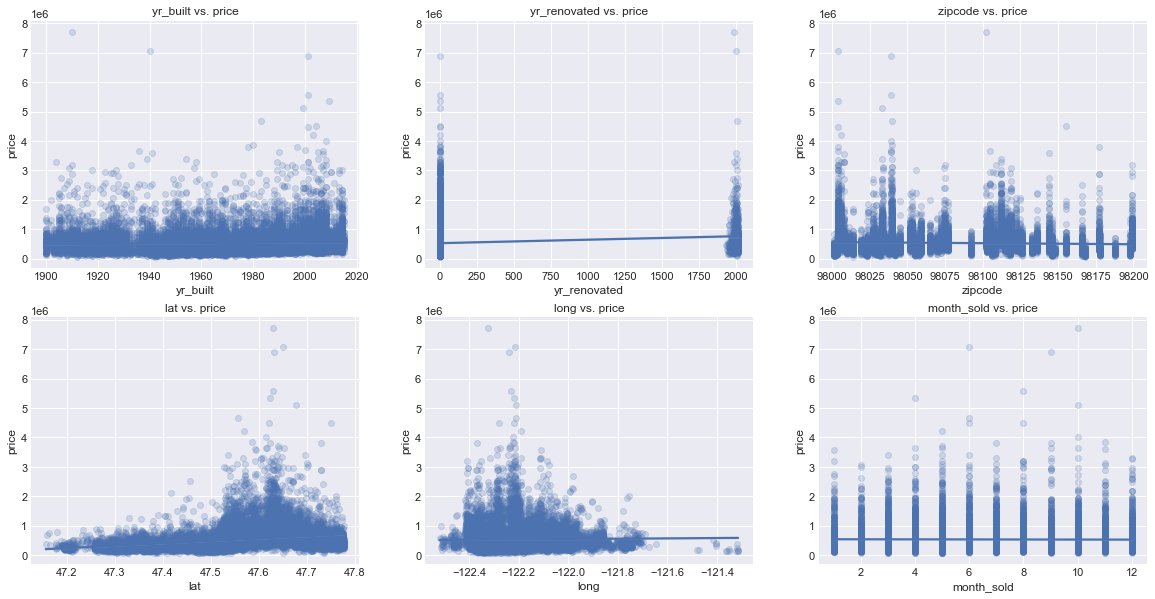

In [37]:
# plot remaining continuous features vs. price
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
for ax, feat in zip(axes.flatten(), cont_feats.columns):
    sns.regplot(x=feat, y='price', data=clean_df, ax=ax, scatter_kws={'alpha': 0.2})
    ax.set_title(f'{feat} vs. price')

Looking at the above, the following feats appear to violate linearity assumptions:
* `yr_built`: no clear pattern 
* `yr_renovated`: slight pattern, but not very pronounced -- may be more useful as categorical feature
* `zipcode`: no clear pattern
* `lat`: slight pattern, with price seeming to spike around lats 47.6 to 47.7 - - potential polynomial relationship?
* `long`: higher prices seem to be related with lower longitudes - slight pattern, but does not appear linear. 
* `month_sold` - no clear pattern, will be more useful as categorical feature

As a result, `yr_built`, `yr_renovated`, `zipcode`, and `month_sold` will not be included as continous features in baseline modeling.

Now will move forward with plotting boxplots of categorical features vs. price - - this will also help inform if any categorical columns have ordinal relationships with price and can be treated as continuous features. 

In [38]:
# separate categorical features
cat_feats = feats[['bedrooms', 'bathrooms', 
                   'floors','waterfront', 
                   'view', 'condition', 
                   'grade', 'month_sold']]

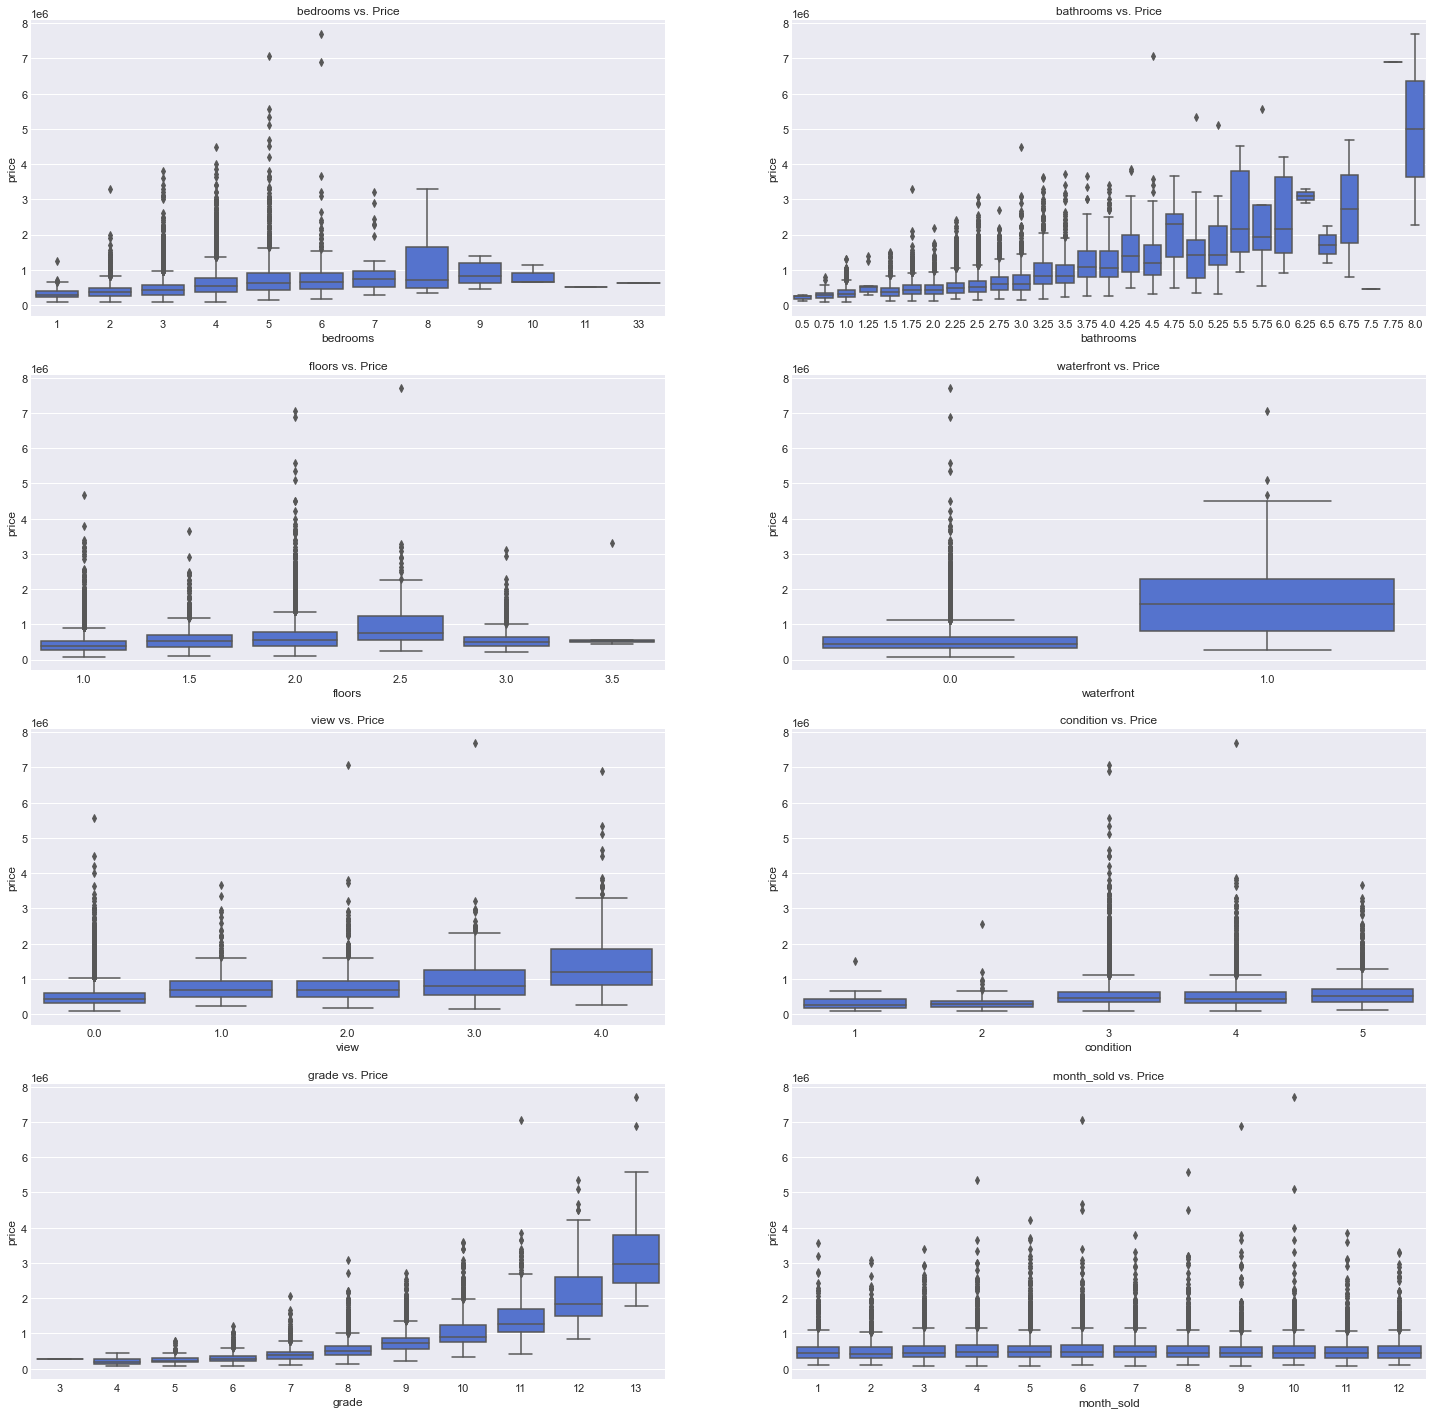

In [39]:
# plot boxplots vs. price for each cat feature
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 25))
for ax, feat in zip(axes.flatten(), cat_feats.columns):
    sns.boxplot(x=feat, y='price', data=clean_df, ax=ax, color='royalblue')
    ax.set_title(f'{feat} vs. Price')

Looking at the plot of the categorical features above, the only potential ordinal relationships sticking out are `grade` and `bathrooms`, despite some noise in bathrooms after values of 6 and higher.  It looks like there may be an exponential relationship between `grade` and `price`.  Moving forward, grade will be the only categorical feature treated as a continuous feature given its ordinal relationship with price. 

Other observations noted were:
* `bedrooms`: appears to be a positive relationship between the number of bedrooms and price until bedrooms equals 8 and higher
* `bathrooms`: generally positive relationship with price, with some changes in the trend with houses that have more than 5 bathrooms
* `floors`: highest priced homes seem to be those with 2.5 floors
* `waterfront`: houses with waterfront views are associated with higher sale prices
* `view`: the more a house has been viewed, generally the higher the sales price
* `condition`: not much trend visible between condition and price
* `month_sold`: no major differences between sale prices for houses sold during different times of the year

Move forward with scaling certain columns: `smf.OLS` runs into syntax issues when using column names ending in `.0` - for this reason, I will scale columns to ensure we don't run into these issues when modeling. 

In [40]:
# scale and convert columns so there are no syntax issues later on
clean_df['scaled_floors'] = clean_df['floors'] * 10
clean_df['scaled_bathrooms'] = clean_df['bathrooms'] * 100
clean_df['waterfront'] = clean_df['waterfront'].astype('int64')
clean_df['view'] = clean_df['view'].astype('int64')

In [41]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21082 non-null  float64
 1   bedrooms          21082 non-null  int64  
 2   bathrooms         21082 non-null  float64
 3   sqft_living       21082 non-null  int64  
 4   sqft_lot          21082 non-null  int64  
 5   floors            21082 non-null  float64
 6   waterfront        21082 non-null  int64  
 7   view              21082 non-null  int64  
 8   condition         21082 non-null  int64  
 9   grade             21082 non-null  int64  
 10  sqft_above        21082 non-null  int64  
 11  sqft_basement     21082 non-null  float64
 12  yr_built          21082 non-null  int64  
 13  yr_renovated      21082 non-null  float64
 14  zipcode           21082 non-null  int64  
 15  lat               21082 non-null  float64
 16  long              21082 non-null  float6

In [42]:
# drop original floors and bathrooms columns
clean_df = clean_df.drop(['floors', 'bathrooms'], axis=1)

In [43]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21082 non-null  float64
 1   bedrooms          21082 non-null  int64  
 2   sqft_living       21082 non-null  int64  
 3   sqft_lot          21082 non-null  int64  
 4   waterfront        21082 non-null  int64  
 5   view              21082 non-null  int64  
 6   condition         21082 non-null  int64  
 7   grade             21082 non-null  int64  
 8   sqft_above        21082 non-null  int64  
 9   sqft_basement     21082 non-null  float64
 10  yr_built          21082 non-null  int64  
 11  yr_renovated      21082 non-null  float64
 12  zipcode           21082 non-null  int64  
 13  lat               21082 non-null  float64
 14  long              21082 non-null  float64
 15  sqft_living15     21082 non-null  int64  
 16  sqft_lot15        21082 non-null  int64 

### Remove Features that Don't Meet Linearity Requirements
From analysis above, we know the following features do not meet linearity assumptions: `yr_built`, `yr_renovated`, `zipcode`, and `month_sold`.  For that reason, they will be removed for baseline modeling.  Future iterations will address these features again to see if any transformations / preprocessing will render them useful going forward. 

In [44]:
# remove features violating linearity requirements
preprocessed_baseline = clean_df.drop(['yr_built', 'yr_renovated', 
                                       'zipcode', 'month_sold'], axis=1)

In [45]:
preprocessed_baseline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21082 non-null  float64
 1   bedrooms          21082 non-null  int64  
 2   sqft_living       21082 non-null  int64  
 3   sqft_lot          21082 non-null  int64  
 4   waterfront        21082 non-null  int64  
 5   view              21082 non-null  int64  
 6   condition         21082 non-null  int64  
 7   grade             21082 non-null  int64  
 8   sqft_above        21082 non-null  int64  
 9   sqft_basement     21082 non-null  float64
 10  lat               21082 non-null  float64
 11  long              21082 non-null  float64
 12  sqft_living15     21082 non-null  int64  
 13  sqft_lot15        21082 non-null  int64  
 14  scaled_floors     21082 non-null  float64
 15  scaled_bathrooms  21082 non-null  float64
dtypes: float64(6), int64(10)
memory usage: 3

### Remove Features with High Multi-Collinearity
To help improve results, and remove issues from our model, we will identify predictors with high levels of correlation and remove these from the model to help address multi-collinearity.  

In [46]:
def multi_collinearity(predictors, threshold=0.75):
    """
    Function to identify multi-collinearity amongst predictors based on a threshold value.
    Parameters include:
    - predictors: dataframe of features to be tested for multi-collinearity
    - threshold: correlation threshold used to determine how many pairs are returned
    """
    
    df = predictors.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    
    # zip the variable name columns (named level_0 and level_1 by default)
    df['pairs'] = list(zip(df['level_0'], df['level_1']))
    
    # set index to pairs
    df.set_index(['pairs'], inplace=True)
    
    # drop level columns
    df.drop(columns=['level_1', 'level_0'], inplace=True)
    
    # rename correlation column as cc rather than 0
    df.columns = ['cc']
    
    # drop duplicates and return
    df.drop_duplicates(inplace=True)
    return df[(df['cc'] > threshold) & (df['cc'] < 1)]

In [51]:
# identify correlated predictors
predictors = preprocessed_baseline.drop(['price'], axis=1)
corr_preds = multi_collinearity(predictors, 0.70)
corr_preds

,cc
pairs,
"(sqft_above, sqft_living)",0.876787
"(sqft_living, grade)",0.762719
"(sqft_above, grade)",0.756289
"(sqft_living, sqft_living15)",0.756199
"(scaled_bathrooms, sqft_living)",0.754793
"(sqft_living15, sqft_above)",0.730794
"(sqft_lot15, sqft_lot)",0.719499
"(sqft_living15, grade)",0.713176


Using a threshold of .70, we see the above correlated predictors.  It makes sense that `sqft_living` is highly correlated with `sqft_above` as `sqft_above` is likely a large percentage of `sqft_living`.  Additionally, `sqft_living` is highly correlated with other features, including `grade`, `sqft_living15`, and `scaled_bathrooms`.  As a result, we will remove this feature for modeling purposes. 

In [52]:
# drop sqft_living
preprocessed_baseline = preprocessed_baseline.drop('sqft_living', axis=1)

In [53]:
# rerun multicollinearity
preds = preprocessed_baseline.drop(['price'], axis=1)
corr_preds = multi_collinearity(preds, 0.70)
corr_preds

,cc
pairs,
"(sqft_above, grade)",0.756289
"(sqft_above, sqft_living15)",0.730794
"(sqft_lot15, sqft_lot)",0.719499
"(grade, sqft_living15)",0.713176


For baseline modeling purposes, I'm also going to remove `grade` as it is correlated with `sqft_above` and `sqft_living15`. 

In [54]:
# drop grade
preprocessed_baseline = preprocessed_baseline.drop('grade', axis=1)

Non-linearity and multicollinearity have now been addressed.  Move on to encoding categorical columns.

### One-Hot Encoding Categorical Columns

In [55]:
preprocessed_baseline.columns

Index(['price', 'bedrooms', 'sqft_lot', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'scaled_floors', 'scaled_bathrooms'],
      dtype='object')

Move forward with encoding categorical columns.  From earlier steps, we know we will be treating grade as an ordinal cat column, and not one hot encoding. 

In [56]:
# identify cat features that will need to be encoded
cat_feats = preprocessed_baseline[['bedrooms', 'waterfront', 'view',
                                   'condition', 'scaled_floors', 'scaled_bathrooms']]

In [57]:
# import necessary libraries
from sklearn.preprocessing import OneHotEncoder

In [77]:
# build encoder 
ohe = OneHotEncoder(drop='first', sparse=False)

In [102]:
# bedrooms
bedrooms_ohe = ohe.fit_transform(cat_feats[['bedrooms']])
bedrooms_ohe = pd.DataFrame(bedrooms_ohe,
                            columns=ohe.categories_[0][1:], # dropped first
                            index=cat_feats.index)

# add suffix to column headers
bedrooms_ohe.columns = [f'{col}-bedrooms' for col in bedrooms_ohe.columns]
bedrooms_ohe.head()

,2-bedrooms,3-bedrooms,4-bedrooms,5-bedrooms,6-bedrooms,7-bedrooms,8-bedrooms,9-bedrooms,10-bedrooms,11-bedrooms,33-bedrooms
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
# waterfront
waterfront_ohe = ohe.fit_transform(cat_feats[['waterfront']])
waterfront_ohe = pd.DataFrame(waterfront_ohe,
                              columns=ohe.categories_[0][1:], # dropped first
                              index=cat_feats.index)

# add suffix to column headers
waterfront_ohe.columns = [f'{col}-waterfront' for col in waterfront_ohe.columns]
waterfront_ohe.head()

,1-waterfront
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [104]:
# view 
view_ohe = ohe.fit_transform(cat_feats[['view']])
view_ohe = pd.DataFrame(view_ohe,
                        columns=ohe.categories_[0][1:], # dropped first
                        index=cat_feats.index)

# add suffix to column headers
view_ohe.columns = [f'{col}-view' for col in view_ohe.columns]
view_ohe.head()

,1-view,2-view,3-view,4-view
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [105]:
# condition
condition_ohe = ohe.fit_transform(cat_feats[['condition']])
condition_ohe = pd.DataFrame(condition_ohe,
                             columns=ohe.categories_[0][1:], # dropped first
                             index=cat_feats.index)

# add suffix to column headers
condition_ohe.columns = [f'{col}-condition' for col in condition_ohe.columns]
condition_ohe.head()

,2-condition,3-condition,4-condition,5-condition
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0


In [106]:
# floors
floors_ohe = ohe.fit_transform(cat_feats[['scaled_floors']])
floors_ohe = pd.DataFrame(floors_ohe,
                          columns=ohe.categories_[0][1:], # dropped first
                          index=cat_feats.index)

# add suffix to column headers
floors_ohe.columns = [f'{col}-floors' for col in floors_ohe.columns]
floors_ohe.head()

,15.0-floors,20.0-floors,25.0-floors,30.0-floors,35.0-floors
0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [107]:
# bathrooms
bathrooms_ohe = ohe.fit_transform(cat_feats[['scaled_bathrooms']])
bathrooms_ohe = pd.DataFrame(bathrooms_ohe,
                             columns=ohe.categories_[0][1:], # dropped first
                             index=cat_feats.index)

# add suffix to column headers
bathrooms_ohe.columns = [f'{col}-baths' for col in bathrooms_ohe.columns]
bathrooms_ohe.head()

,75.0-baths,100.0-baths,125.0-baths,150.0-baths,175.0-baths,200.0-baths,225.0-baths,250.0-baths,275.0-baths,300.0-baths,...,525.0-baths,550.0-baths,575.0-baths,600.0-baths,625.0-baths,650.0-baths,675.0-baths,750.0-baths,775.0-baths,800.0-baths
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now that all categorical features have been encoded using a one-hot encoder, move forward with concatenating with continuous features and dropping original categorical features. 

In [108]:
# concat datasets
baseline_df = pd.concat([preprocessed_baseline, 
                         bedrooms_ohe,
                         waterfront_ohe,
                         view_ohe,
                         condition_ohe,
                         floors_ohe,
                         bathrooms_ohe], axis=1)

# drop original cat feats
baseline_df = baseline_df.drop(['bedrooms', 'waterfront', 'view', 'condition',
                                'scaled_floors', 'scaled_bathrooms'], axis=1)

In [109]:
# baseline_df
baseline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21082 non-null  float64
 1   sqft_lot       21082 non-null  int64  
 2   sqft_above     21082 non-null  int64  
 3   sqft_basement  21082 non-null  float64
 4   lat            21082 non-null  float64
 5   long           21082 non-null  float64
 6   sqft_living15  21082 non-null  int64  
 7   sqft_lot15     21082 non-null  int64  
 8   2-bedrooms     21082 non-null  float64
 9   3-bedrooms     21082 non-null  float64
 10  4-bedrooms     21082 non-null  float64
 11  5-bedrooms     21082 non-null  float64
 12  6-bedrooms     21082 non-null  float64
 13  7-bedrooms     21082 non-null  float64
 14  8-bedrooms     21082 non-null  float64
 15  9-bedrooms     21082 non-null  float64
 16  10-bedrooms    21082 non-null  float64
 17  11-bedrooms    21082 non-null  float64
 18  33-bed

We have successfully one-hot encoded categorical features and concatenated with our continuous features. Our dataset is now ready for modeling. 

## 4. Modeling 
To begin, we will run a baseline model to compare subsequent model performance to.  To ensure we are only including statistically significant features, we will perform stepwise feature selection. 

In [114]:
# import necessary libraries
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms

### Stepwise Feature Selection

In [115]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """
    Function to perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Parameters:
        X: pandas.Dataframe with candidate features
        y: list-like with the target
        initial_list: list of features to start with (column names of X)
        threshold_in: include a feature if its p-val < threshold_in
        threshold_out: exclude a feature if its p-val > threshold_out
        verbose: whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    Note: always set threshold_in < threshold_out to avoid infinite looping
    """
    included = list(initial_list)
    while True:
        changed=False
        
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [116]:
# separate out target and predictors from baseline_df
y = baseline_df['price']
X = baseline_df.drop('price', axis=1)

### Baseline Modeling

In [117]:
# run stepwise selection to select features based on p-val
baseline_features = stepwise_selection(X, y, verbose=True)

Add  lat                            with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  4-view                         with p-value 0.0
Add  sqft_basement                  with p-value 0.0
Add  long                           with p-value 4.89919e-179
Add  1-waterfront                   with p-value 6.56711e-138
Add  250.0-baths                    with p-value 6.83046e-84
Add  775.0-baths                    with p-value 6.57635e-71
Add  3-view                         with p-value 2.00521e-60
Add  5-condition                    with p-value 3.12227e-47
Add  2-view                         with p-value 6.16233e-39
Add  2-bedrooms                     with p-value 3.27529e-32
Add  3-bedrooms                     with p-value 6.94063e-41
Add  4-condition                    with p-value 2.19756e-28
Add  25.0-floors                    with p-value 5.75394e-25
Add  1-view                         with p-value 6.07941e-23
A

In [118]:
# run regression with these features
X = baseline_df[baseline_features]
y = baseline_df['price']
preds = sm.add_constant(X)
model = sm.OLS(y, preds).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     1072.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:29:35   Log-Likelihood:            -2.8779e+05
No. Observations:               21082   AIC:                         5.757e+05
Df Residuals:                   21038   BIC:                         5.760e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.925e+07   1.49e+06    -39.678      0.000   -6.22e+07   -5.63e+07
lat            6.526e+05   1.06e+04     61.291      0.000    6.32e+05    6.73e+05
sqft_above      217.4118      3.411     63.732      0.000     210.725     224.098
sqft_living15    89.7162      3.459     25.940      0.000      82.937      96.495
4-view         3.091e+05   1.47e+04     21.050      0.000     2.8e+05    3.38e+05
sqft_basement   172.7765      4.183     41.302      0.000     164.577     180.976
long          -2.303e+05   1.18e+04    -19.440      0.000   -2.54e+05   -2.07e+05
1-waterfront   5.396e+05   2.12e+04     25.418      0.000    4.98e+05    5.81e+05
250.0-baths   -3.213e+04   4078.112     -7.879      0.000   -4.01e+04   -2.41e+04
775.0-baths    4.283e+06   2.07e+05     20.655      0.000    3.88e+06    4.69e+06
3-view          1.61e+05   9737.098     16.532      0.000    1.42e+05     1.8e+05
5-condition    1.006e+05   5507.368     18.258      0.000    8.98e+04    1.11e+05
2-view         9.063e+04   7108.604     12.750      0.000    7.67e+04    1.05e+05
3-bedrooms    -3.847e+04   4645.105     -8.281      0.000   -4.76e+04   -2.94e+04
4-condition    4.556e+04   3428.490     13.289      0.000    3.88e+04    5.23e+04
25.0-floors    1.867e+05   1.69e+04     11.064      0.000    1.54e+05     2.2e+05
1-view         1.179e+05   1.16e+04     10.128      0.000    9.51e+04    1.41e+05
475.0-baths    5.854e+05   4.39e+04     13.347      0.000    4.99e+05    6.71e+05
550.0-baths    9.006e+05   6.97e+04     12.925      0.000    7.64e+05    1.04e+06
800.0-baths    1.946e+06    1.5e+05     13.013      0.000    1.65e+06    2.24e+06
425.0-baths    3.139e+05   2.44e+04     12.842      0.000    2.66e+05    3.62e+05
600.0-baths    9.567e+05   9.27e+04     10.323      0.000    7.75e+05    1.14e+06
375.0-baths    2.093e+05   1.75e+04     11.979      0.000    1.75e+05    2.44e+05
325.0-baths    1.046e+05   9539.472     10.966      0.000    8.59e+04    1.23e+05
400.0-baths    2.073e+05   1.87e+04     11.100      0.000    1.71e+05    2.44e+05
525.0-baths    5.779e+05   5.84e+04      9.903      0.000    4.64e+05    6.92e+05
450.0-baths    2.167e+05   2.22e+04      9.745      0.000    1.73e+05     2.6e+05
500.0-baths    3.931e+05   4.79e+04      8.212      0.000    2.99e+05    4.87e+05
350.0-baths    6.291e+04   8876.469      7.087      0.000    4.55e+04    8.03e+04
575.0-baths    8.044e+05   1.04e+05      7.719      0.000       6e+05    1.01e+06
6-bedrooms    -1.831e+05   1.41e+04    -12.950      0.000   -2.11e+05   -1.55e+05
7-bedrooms    -3.608e+05   3.57e+04    -10.115      0.000   -4.31e+05   -2.91e+05
15.0-floors    3.919e+04   5200.555      7.536      0.000     2.9e+04    4.94e+04
sqft_lot15       -0.5710      0.076     -7.471      0.000      -0.721      -0.421
625.0-baths    9.274e+05   1.46e+05      6.333   